In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scienceplots
import numpy as np
import json
 # Need SciencePLots
params = {
         'axes.labelsize': 10,
         'axes.titlesize': 10,
         'ytick.labelsize' : 15,
         'xtick.labelsize' : 15,
         'xtick.major.size': 4,
         'xtick.minor.size': 4,
         'xtick.major.width': 0.5,
         'xtick.minor.width': 0.5,
         'ytick.color': "k",
         'xtick.color': "k",
         'axes.labelcolor': "k",
         'ytick.labelcolor' : "k",
         'xtick.labelcolor' : "k",
         }
pylab.rcParams.update(params)


data_dir = "../../../data/tarp_data/"
json_file = "skirt64_postneurips_pc.json"
npz_file = "tarp_bootstrapping_pc_skirt64_postneurips_pc_500sims_500samples.npz"
with open(data_dir+json_file, 'r') as jf:
    json_data = json.load(jf)

# Loading the data
npz_data = np.load(data_dir + npz_file)
alpha = npz_data["alpha"]
ecp = npz_data["ecp"]
ecp_std = npz_data["ecp_std"]
factor_uncertainty = 3




# print("Generating the coverage figure...")
# labels = [0., 0.2, 0.4, 0.6, 0.8, 1]
# fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi = 150)
# ax.plot([0, 1], [0, 1], ls='--', color='k', label = "Ideal case")
# ax.plot(alpha, ecp, label='DRP', color = "red")
# ax.fill_between(alpha, ecp - factor_uncertainty * ecp_std, ecp + factor_uncertainty * ecp_std, alpha = 0.5, color = "red", label = "99.7% CI")
# ax.legend()
# ax.set_xlabel("Credibility Level")
# ax.set_ylabel("Expected Coverage Probability")
# ax.set_xticks(labels)
# ax.set_xticklabels(labels)
# ax.set_yticks(labels[1:])
# ax.set_yticklabels(labels[1:])
# ax.set(xlim = [0, 1], ylim = [0, 1])


# plt.title("PC VP SKIRT, 64*64, Bootstrapping")
# fig.text(x = 0.5, y = 0.2, s= "4000 predictor steps \n20 corrector steps\nsnr=0.1")

# save_dir = "C:/Users/noedi/Desktop/Ciela/Projects/bayesian_imaging_radio/data/tarp_data/plot"
# plt.savefig(save_dir +  "f.pdf", bbox_inches = "tight", pad_inches = 0.2)

In [25]:

 # Need SciencePLots
params = {
         'axes.labelsize': 10,
         'axes.titlesize': 10,
         'ytick.labelsize' : 12,
         'xtick.labelsize' : 12,
         'xtick.major.size': 4,
         'xtick.minor.size': 4,
         'xtick.major.width': 0.5,
         'xtick.minor.width': 0.5,
         'ytick.color': "k",
         'xtick.color': "k",
         'axes.labelcolor': "k",
         'ytick.labelcolor' : "k",
         'xtick.labelcolor' : "k",
         }
pylab.rcParams.update(params)

In [2]:
A = (1,2,3)
np.array(A)

array([1, 2, 3])

In [16]:
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scienceplots
import numpy as np
from glob import glob


def plot_tarp(ax, alpha, ecp, ecp_std, predictor, corrector, snr, factor_uncertainty = 3, title = True, color = "red"):
    print("Generating the coverage figure...")
    labels = [0., 0.2, 0.4, 0.6, 0.8, 1]
    # fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi = 150)
    ax.plot([0, 1], [0, 1], ls='--', color='k', label = "Ideal case")
    ax.plot(alpha, ecp, label='DRP', color = color)
    ax.fill_between(alpha, ecp - factor_uncertainty * ecp_std, ecp + factor_uncertainty * ecp_std, alpha = 0.5, color = color, label = "99.7% CI")
    ax.legend()
    ax.set_xlabel("Credibility Level")
    ax.set_ylabel("Expected Coverage Probability")
    ax.set_xticks(labels)
    ax.set_xticklabels(labels)
    ax.set_yticks(labels[1:])
    ax.set_yticklabels(labels[1:])
    ax.set(xlim = [0, 1], ylim = [0, 1])

    if title:
        ax.set_title(f"{int(predictor)} predictor steps, {int(corrector)} corrector steps \n snr = {snr}", y = 1.05)

In [6]:
import re 
pattern ="*.npz"
folder_dir = "../../../data/tarp_data/skirt64/coverage_data"
data_dir = os.path.join(folder_dir, pattern)
paths = glob(data_dir)

coverage_data = []
for i, path in enumerate(paths): 
    data = np.load(path)
    ecp = data['ecp']
    ecp_std = data['ecp_std']
    alpha = data['alpha']
    predictor, corrector, snr = data["sampling_params"]
    globals()[f'data_{i+1}'] = (alpha, ecp, ecp_std, predictor, corrector, snr)
    # plot_tarp(alpha, ecp, ecp_std)
    # print(data.files)
    coverage_data.append(globals()[f"data_{i+1}"])

In [32]:
import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"

Generating the coverage figure...


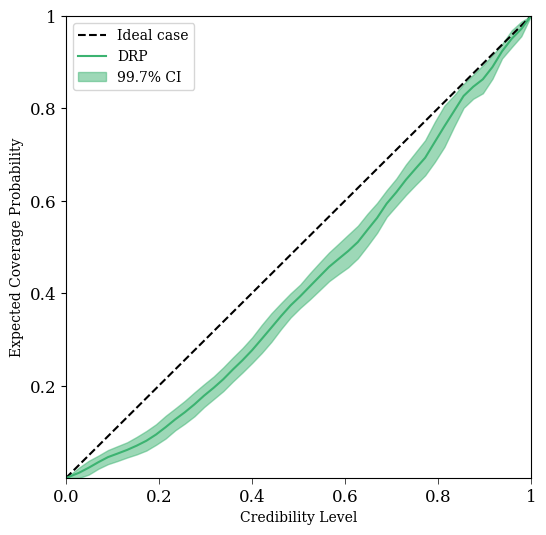

In [33]:
fig, ax = plt.subplots(1,1, figsize = (6, 6))
plot_tarp(ax, *coverage_data[0], title = False, color = "mediumseagreen")
plt.savefig("C:/Users/noedi/Desktop/Ciela/Presentations_posters/tarp_skirt.pdf", bbox_inches = "tight")

Generating the coverage figure...
Generating the coverage figure...
Generating the coverage figure...
Generating the coverage figure...


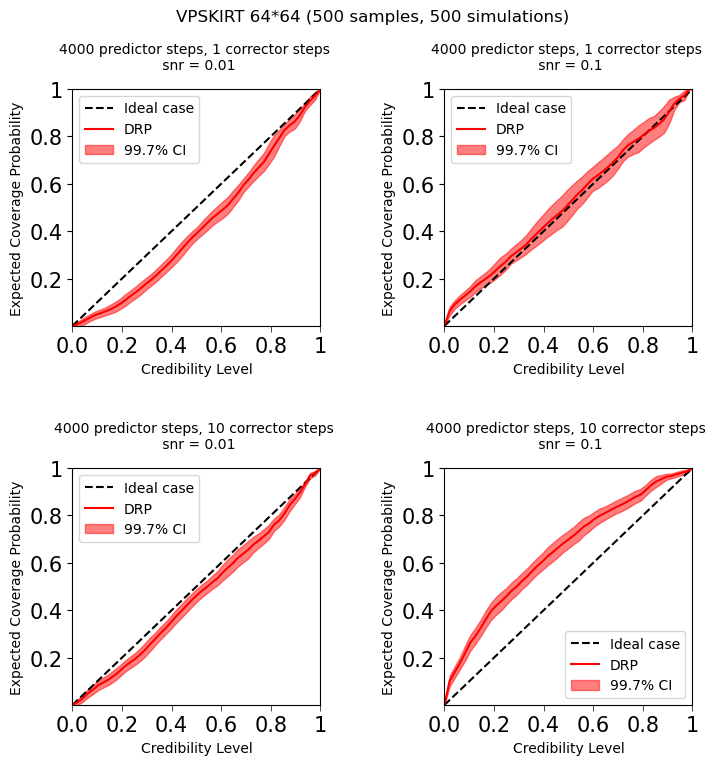

In [7]:
fig, axs = plt.subplots(2, 2, figsize = (4*2, 4*2))

for i, ax in enumerate(axs.flatten()):
    plot_tarp(ax, *coverage_data[i])

plt.subplots_adjust(wspace = 0.5, hspace = 0.6)
fig.suptitle("VPSKIRT 64*64 (500 samples, 500 simulations)")

image_dir = "../../../data/images/vpskirt_tarp_grid.pdf"
#plt.savefig(image_dir, bbox_inches = "tight")

## Histograms for (let's hope) $\chi^2$ samples and fitting 

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scienceplots
import numpy as np
import sys
from glob import glob
sys.path.append("../src/data_analysis/")
from chi_squared_fit import chi2_pdf, neg_log_likelihood, fit_chi2

from scipy.stats import chi2

In [15]:
dataset = "skirt"
pattern ="*.npz"
folder_dir = f"../../../data/tarp_data/{dataset}64"
cov_data_dir = os.path.join(folder_dir, "coverage_data", pattern)
chi_data_dir = os.path.join(folder_dir, "chi_data", pattern)

cov_paths = glob(cov_data_dir)
chi_paths = glob(chi_data_dir)


coverage_data = []
chi_data = []
for i, path in enumerate(cov_paths): 
    cov_data = np.load(path)
    ecp = cov_data['ecp']
    ecp_std = cov_data['ecp_std']
    alpha = cov_data['alpha']
    predictor, corrector, snr = cov_data["sampling_params"]
    globals()[f'data_{i+1}'] = (alpha, ecp, ecp_std, int(predictor), int(corrector), snr)

    # Forcing coverage_data[i], chi_data[i] to have the same sampling params
    for j, path2 in enumerate(chi_paths):
        chi = np.load(path2)
        chi_samples = chi["chi_samples"]
        predictor2, corrector2, snr2 = chi["sampling_params"]
        if predictor == predictor2 and corrector == corrector2 and snr == snr2: 
            globals()[f'chi_{j+1}'] = (chi_samples, int(predictor), int(corrector), snr)
            break
        else: 
            continue

    assert np.isnan(chi_samples).any() == False, "Nans were detected in the chi samples"
    # plot_tarp(alpha, ecp, ecp_std)
    # print(data.files)
    coverage_data.append(globals()[f"data_{i+1}"])
    chi_data.append(globals()[f"chi_{j+1}"])



In [103]:
chi_samples, predictor, corrector, snr = chi_data[0]

In [23]:
result = chi2.fit(chi_samples, f0 = 7412)

In [25]:
result

(7412, -12145.4654997006, 2.6580778500511704)

In [16]:
from scipy.stats import chi2
from scipy.optimize import minimize
def chi2_pdf(x, k): 
    return chi2.pdf(x, k)

def neg_log_likelihood(k, x): 
    """
    Computes the negative log-likelihood of the chi squared distribution for a 
    certain number of degrees of freedom k given some observed samples x.  

    Args:
        k (float): Number of degrees of freedom of the chi squared distribution
        x (np.array): Observed samples

    Returns:
        np.array: negative log-likelihood for the given parameters. 
    """
    return -np.sum(np.log(chi2_pdf(x, k)))

def fit_chi2(k, x): 
    """
    Fits a chi-squared distribution on the observed samples x

    Args:
        k (float): Initial guess for the number of degrees of freedom of the underlying chi-squared distribution (parameter to fit)
        x (np.array): Observed samples

    Returns:
        Output of the minimize function of scipy.stats (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)
    """
    result = minimize(neg_log_likelihood, x0 = k, args = (x,))
    return result


    
k_true = 7412
# try:
#     result = fit_chi2(k = k_true, x = chi_samples)

# except RuntimeWarning or : 
#     k_optimal = None
#     print("Optimization Failed")


    
# k_optimal = None
# print("Optimization Failed")


# print(rf"Fitted dof = {k_optimal:.0f} +/- {sigma_k:.0f} | True dof = {k_true}")

In [17]:

def plot_tarp(ax, alpha, ecp, ecp_std, predictor, corrector, snr, factor_uncertainty = 3):
    print("Generating the coverage figure...")
    labels = [0., 0.2, 0.4, 0.6, 0.8, 1]
    # fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi = 150)
    ax.plot([0, 1], [0, 1], ls='--', color='k', label = "Ideal case")
    ax.plot(alpha, ecp, label='DRP', color = "red")
    ax.fill_between(alpha, ecp - factor_uncertainty * ecp_std, ecp + factor_uncertainty * ecp_std, alpha = 0.5, color = "red", label = "99.7% CI")
    ax.legend()
    ax.set_xlabel("Credibility Level")
    ax.set_ylabel("Expected Coverage Probability")
    ax.set_xticks(labels)
    ax.set_xticklabels(labels)
    ax.set_yticks(labels[1:])
    ax.set_yticklabels(labels[1:])
    ax.set(xlim = [0, 1], ylim = [0, 1])
    ax.set_title(f"{int(predictor)} predictor steps, {int(corrector)} corrector steps \n snr = {snr}", y = 1.01, fontsize = 10)

def plot_chi(ax, chi_samples, k_true, predictor, corrector, snr, k_optimal = None, sigma_k = None, num_bins = 500, log = True):
    x = np.linspace(k_true-1000, k_true + 1000, int(1e5))
    chi_true = chi2.pdf(x, k_true)
    
    ax.hist(chi_samples, bins = num_bins, alpha = 1, color = "tab:blue", density = True, label = r"$q_\nu = \frac{||\mathbf{y}-\hat{\mathbf{y}}||^2}{\sigma^2}$")
    ax.plot(x, chi_true, color = "green", alpha = 1,  label = r"$\chi^{2}_{true}$")
  
    ax.axvline(k_true, color = "green",  linestyle = "--", alpha = 0.4, label = rf"$\nu_{{true}}={k_true:.0f}$ ")

    
    if k_optimal != None:
        chi_fit = chi2.pdf(x, k_optimal)
        ax.plot(x, chi_fit, alpha = 1, color = "orange", label = r"$\chi^{2}_{fitted}$")
        ax.axvline(k_optimal,   color = "orange", linestyle = "--", alpha = 0.4, label = rf"$\nu_{{fitted}}\approx{k_optimal:.0f}\pm {int(sigma_k)}$")

    else: 
        ax.text(s = r"$\chi^2$ fitting failed.", x = 0.1, y = 0.5, transform = ax.transAxes, color = "red")

    ax.set_xlim([k_true-1000, k_true+1000])
    
    ax.set_title(f"{int(predictor)} predictor steps, {int(corrector)} corrector steps \n snr = {snr}")
    
    if log: 
        ax.set_xscale("log")
    ax.legend()
    
    

Generating the coverage figure...
Generating the coverage figure...
Generating the coverage figure...
Generating the coverage figure...


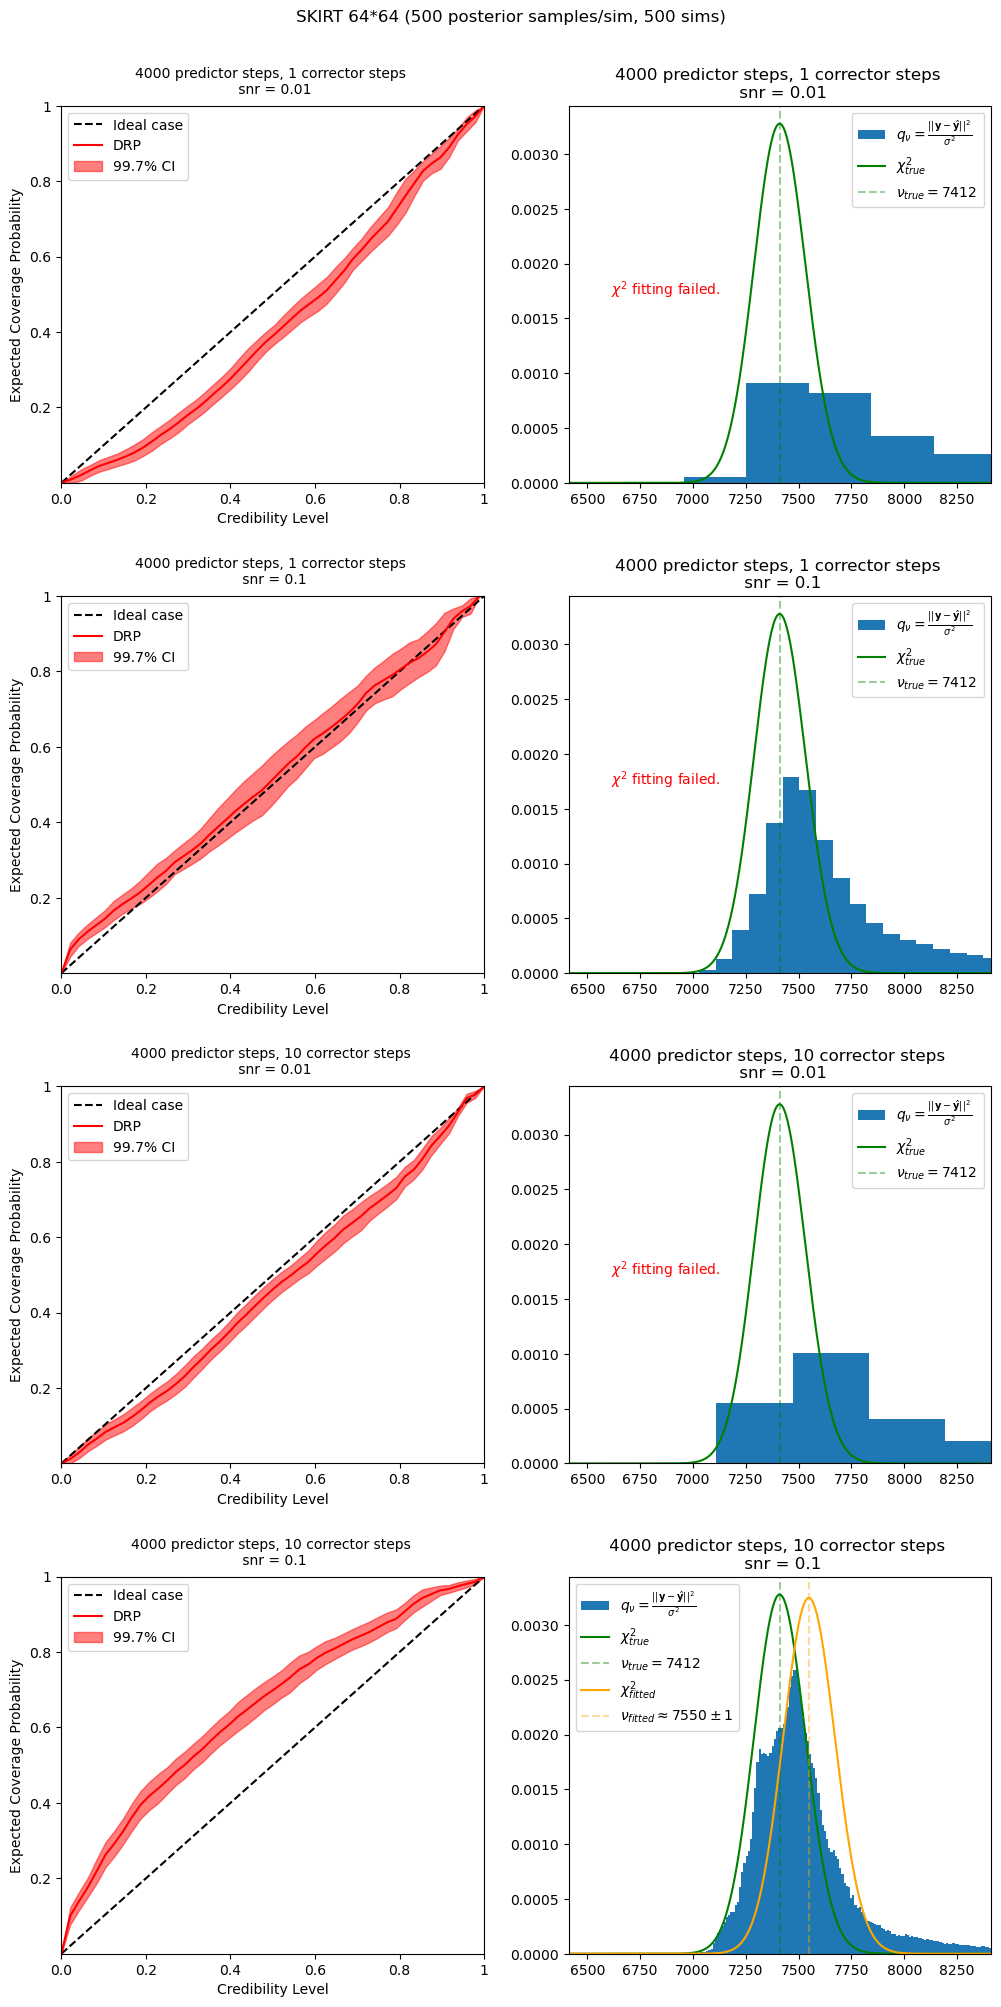

In [18]:
import warnings



fig, axs = plt.subplots(4, 2, figsize = (6*2, 6*4))
k_true = 7412

for i in range(len(coverage_data)):
    plot_tarp(axs[i, 0], *coverage_data[i])

    chi_samples, predictor, corrector, snr = chi_data[i]


    # Handling the errors to not plot the fitted chi squared if the optimization fails
    with warnings.catch_warnings(record=True) as w:
        result = fit_chi2(k = k_true, x = chi_samples)    
        k_optimal = result.x[0]
        sigma_k = np.ceil(np.sqrt(result.hess_inv).item())


    warning_messages = [str(warning.message) for warning in w]

    # If there are warnings and that the fitting fails, no plot for the chi squared fitted 
    if len(warning_messages)>0: 
        k_optimal = None
        sigma_k = None
    
    plot_chi(axs[i, 1], 
                chi_samples = chi_samples, 
                predictor=predictor, 
                corrector=corrector, 
                snr = snr, 
                k_true = k_true, 
                k_optimal = k_optimal,
                sigma_k = sigma_k,
                log = False,
                num_bins = 500)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
fig.suptitle(f"{dataset.upper()} 64*64 (500 posterior samples/sim, 500 sims)", y = 0.92)
plt.savefig(f"../../../data/images/tarp_chi_linear_{dataset}.pdf", bbox_inches = "tight")

In [115]:
warning_messages

['divide by zero encountered in log', 'invalid value encountered in subtract']

In [ ]:
# Optimization failed...

Text(0.5, 0.5, 'HAHAHAA')

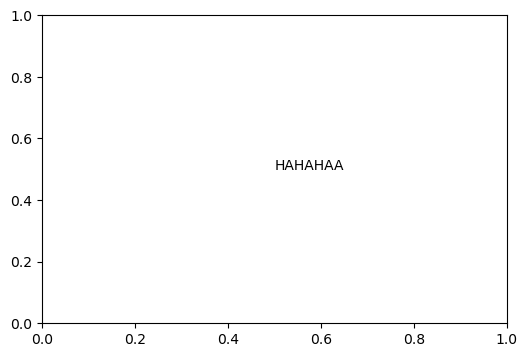

In [158]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax.text(0.5, 0.5, "HAHAHAA")

In [ ]:
fig, axs = plt.subplots(4, 2)

In [32]:
np.ceil(sigma_k)

1.0

In [40]:
result.hess_inv

array([[0.02483111]])

In [34]:
x = np.linspace(0, int(1e4), int(1e5))
chi_fit = chi2.pdf(x, k_optimal)
chi_true = chi2.pdf(x, 7412)

In [68]:
chi_fit.max()

0.003276998072702974

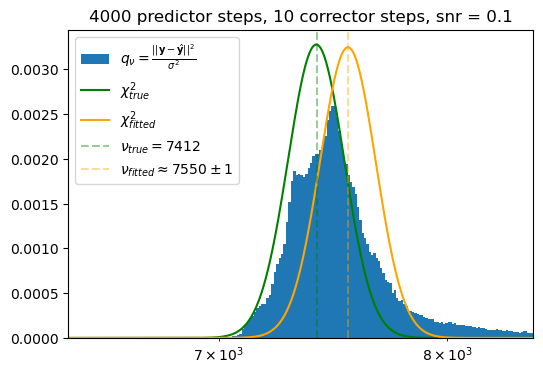

In [79]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
ax.hist(chi_samples, bins = 500, alpha = 1, color = "tab:blue", density = True, label = r"$q_\nu = \frac{||\mathbf{y}-\hat{\mathbf{y}}||^2}{\sigma^2}$")
ax.plot(x, chi_true,  alpha = 1, color = "green",           label = r"$\chi^{2}_{true}$")
ax.plot(x, chi_fit, alpha = 1, color = "orange",            label = r"$\chi^{2}_{fitted}$")
plt.xscale("log")
# plt.plot(x, f, color = "green", label = rf"$\chi_\nu^2$ fit, $\nu={optimal_k:.2g}$")

ax.axvline(k_true,      color = "green",  linestyle = "--", alpha = 0.4, label = rf"$\nu_{{true}}={k_true:.0f}$ ")
ax.axvline(k_optimal,   color = "orange", linestyle = "--", alpha = 0.4, label = rf"$\nu_{{fitted}}\approx{k_optimal:.0f}\pm {int(sigma_k)}$")


ax.set_xlim([k_true-1000, k_true+1000])
ax.set_xscale("log")
ax.set_title(f"{int(predictor)} predictor steps, {int(corrector)} corrector steps, snr = {snr}")
ax.legend()


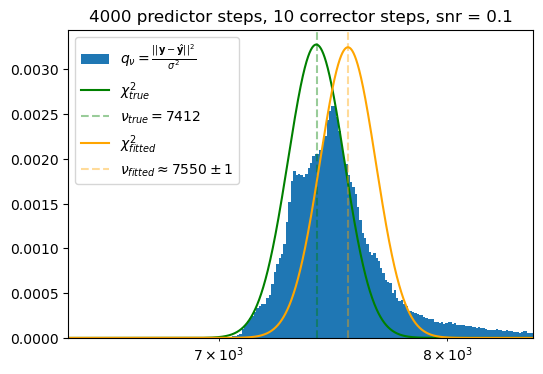

In [88]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
plot_chi(chi_samples=chi_samples, k_true=k_true, k_optimal=k_optimal, ax = ax)

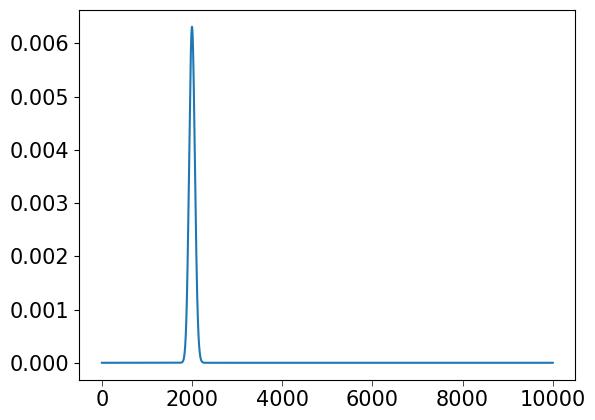

In [77]:
plt.plot(x, chi2.pdf(x, 2000))

In [28]:
numbers = re.findall(r'\d+', path)

# Convert the list of strings to floats
numbers = [float(num) if '.' in num else int(num) for num in numbers]

In [29]:
numbers

[64, 4000, 10, 0, 1]

In [ ]:
for path in paths: 
    path.

In [11]:
paths

['../../../data/tarp_data/skirt64/coverage_data\\tarp_bootstrapping_4000pred_10corr_0.01snr.npz',
 '../../../data/tarp_data/skirt64/coverage_data\\tarp_bootstrapping_4000pred_10corr_0.1snr.npz',
 '../../../data/tarp_data/skirt64/coverage_data\\tarp_bootstrapping_4000pred_1corr_0.01snr.npz',
 '../../../data/tarp_data/skirt64/coverage_data\\tarp_bootstrapping_4000pred_1corr_0.1snr.npz']

In [15]:
def extract_tarp_params_json(json_file): 
    with open(json_file, 'r') as jf:
        json_data = json.load(jf)
    
    

{'num_samples': 500,
 'num_sims': 500,
 'model_pixels': 64,
 'dataset': 'skirt',
 'sde': 'VP',
 'experiment_name': 'skirt64_postneurips_pc',
 'sampling_params': [4000, 20, 0.1]}

In [1]:
import score_models
from score_models import ScoreModel
import torch
import matplotlib.pyplot as plt

In [2]:
file = "../../score_models/ncsnpp_vp_skirt_y_64_230813225149/"
score_model = ScoreModel(checkpoints_directory = file)

Using the Variance Preserving SDE


In [3]:
sample = score_model.sample(shape = [1, 1, 64, 64], steps = 500)

Sampling from the prior | t = 0.0 | sigma = 7.8e-03| scale ~ 8.1e+00: 100%|██████████| 500/500 [00:21<00:00, 23.31it/s]


In [4]:
t[i]

NameError: name 't' is not defined

tensor([[[[-0.0509,  0.0764, -0.0665,  ...,  0.0052, -0.0455, -0.0069],
          [ 0.0095,  0.0164,  0.0176,  ...,  0.0612, -0.0239, -0.0296],
          [-0.0366, -0.0339, -0.0207,  ..., -0.0632,  0.0799, -0.0451],
          ...,
          [ 0.0297,  0.1371, -0.0588,  ...,  0.0369, -0.0347, -0.0127],
          [-0.0409, -0.0658, -0.0477,  ..., -0.0478, -0.0425, -0.0324],
          [ 0.0145, -0.0095, -0.0331,  ...,  0.0737, -0.0577, -0.0141]]]],
       device='cuda:0')
tensor([[[[-0.0183,  0.2394, -0.3593,  ...,  0.0214, -0.2340,  0.0240],
          [ 0.0906, -0.1903,  0.0396,  ...,  0.1237,  0.0367, -0.0297],
          [-0.1778,  0.0336, -0.1402,  ..., -0.1087,  0.2270,  0.2497],
          ...,
          [ 0.0486, -0.1629, -0.0013,  ...,  0.1371,  0.1757,  0.1429],
          [-0.0974, -0.2615,  0.0506,  ..., -0.0371, -0.0983,  0.0391],
          [ 0.1788,  0.1005, -0.1121,  ...,  0.2712,  0.0912,  0.0325]]]],
       device='cuda:0')
tensor([[[[ 0.2925,  0.5101, -0.0590,  ...,  0.0775,

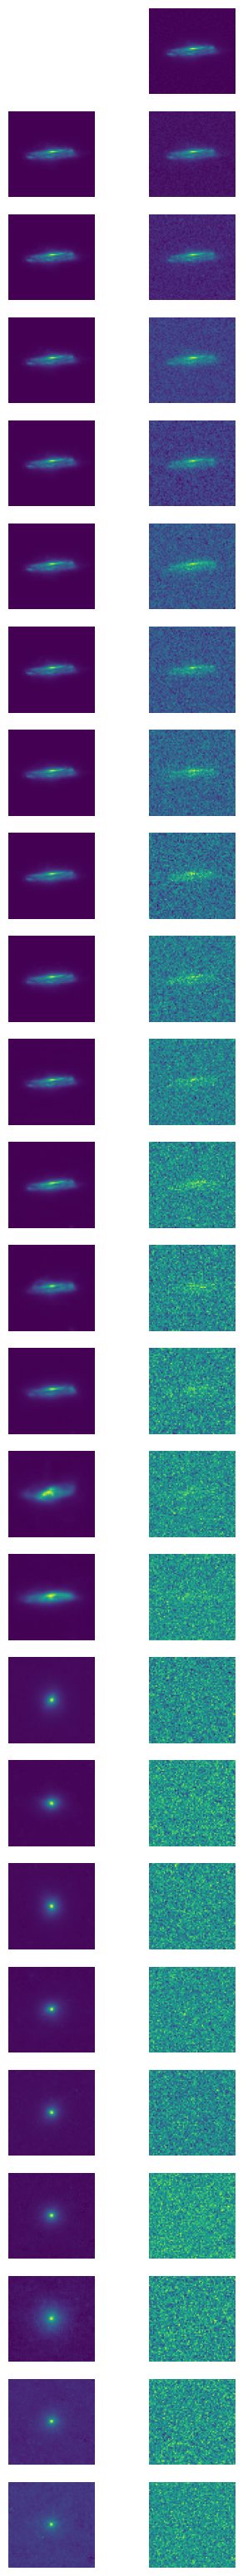

In [5]:
fig, axs = plt.subplots(25, 2, figsize = (4, 40))


t = torch.linspace(0, 1, 25).to(device = sample.device)

for i in range(25): 
    z = torch.randn_like(sample)
    mu, sigma = score_model.sde.marginal_prob_scalars(t[i])
    x_t = mu * sample + sigma * z
    print(x_t)
    x_0 = (x_t + sigma**2 * score_model.score(t[i].unsqueeze(dim = 0), x_t)) / mu
    axs[i, 0].imshow(x_0.detach().squeeze().cpu())
    axs[i, 1].imshow(x_t.detach().squeeze().cpu())
    axs[i, 0].axis("off")
    axs[i, 1].axis("off")
    


In [ ]:
np.load(tarp_data)